Total samples: 8510
Classes distribution:
score
3.0    3099
2.0    2297
4.0    1964
1.0     602
5.0     474
6.0      74
Name: count, dtype: int64
Number of classes: 6
Training samples: 6808
Validation samples: 851
Test samples: 851


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling                   │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 839ms/step - accuracy: 0.2987 - loss: 1.6209 - val_accuracy: 0.4524 - val_loss: 1.3401
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 905ms/step - accuracy: 0.4224 - loss: 1.3534 - val_accuracy: 0.4618 - val_loss: 1.2697
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 843ms/step - accuracy: 0.4660 - loss: 1.2461 - val_accuracy: 0.4548 - val_loss: 1.2158
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 844ms/step - accuracy: 0.5287 - loss: 1.1421 - val_accuracy: 0.4865 - val_loss: 1.1697
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 823ms/step - accuracy: 0.6027 - loss: 1.0003 - val_accuracy: 0.5041 - val_loss: 1.1438
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 88s 905ms/step - accuracy: 0.6952 - loss: 0.8282 - val_accuracy: 0.5159 - val_loss: 1.1351
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 838ms/step - accuracy: 0.7631 - loss: 0.6862 - val_accuracy: 0.5029 - val_loss: 1.1345
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 872ms/step - accuracy: 0.8361 - loss: 0.5237 - val_accu

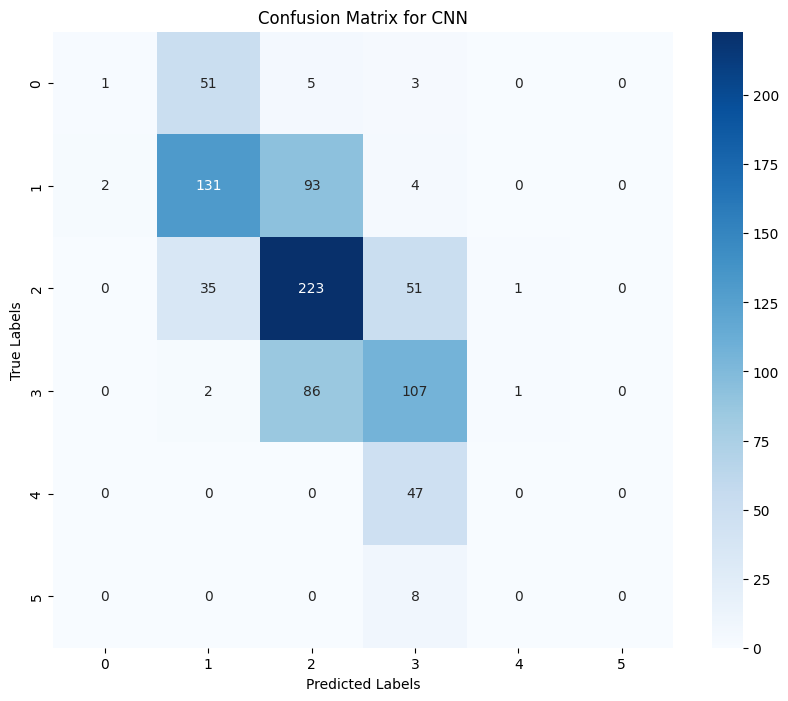

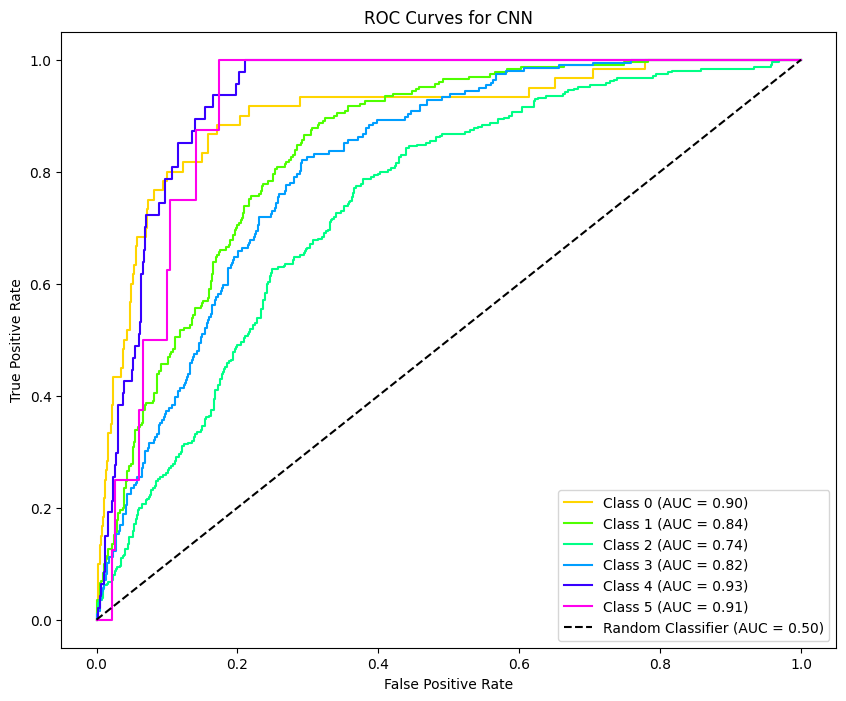

Test Accuracy: 0.5429
Performance report generated and saved as 'model_performance_report_cnn.md'.


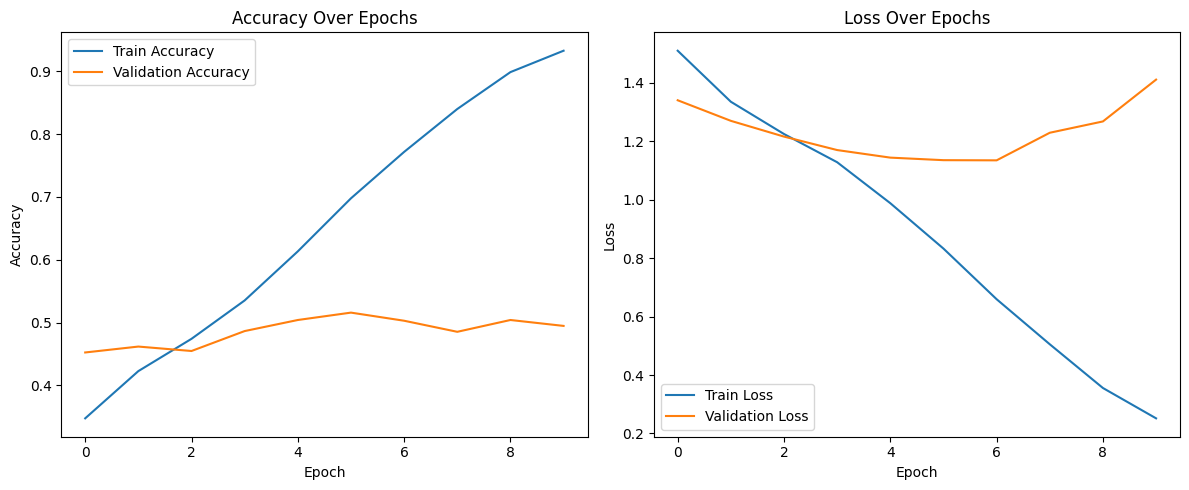

In [2]:
# ------------------------------ Imports ------------------------------

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import TensorFlow and Keras for building the model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Import tools for splitting data and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_score, recall_score,
    fbeta_score, cohen_kappa_score
)
from sklearn.preprocessing import label_binarize

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ------------------------------ Data Loading ------------------------------

# Load the dataset from 'train.csv' and drop any missing values to ensure data integrity
train_data = pd.read_csv("train.csv").dropna()

# Print the total number of samples in the dataset
print(f"Total samples: {train_data.shape[0]}")

# Print the distribution of classes in the 'score' column to understand class balance
print("Classes distribution:")
print(train_data['score'].value_counts())

# ------------------------------ Preprocessing ------------------------------

# Define the maximum number of words to consider in the tokenizer (vocabulary size)
max_features = 20000

# Define the maximum length of each sequence (number of tokens per sample)
max_len = 500

# Initialize the Tokenizer with the defined vocabulary size and an out-of-vocabulary token
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")

# Fit the tokenizer on the 'full_text' column to build the word index
tokenizer.fit_on_texts(train_data['full_text'])

# Convert the texts to sequences of integers based on the tokenizer's word index
X_sequences = tokenizer.texts_to_sequences(train_data['full_text'])

# Pad the sequences to ensure all sequences have the same length (max_len)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post', truncating='post')

# Extract the 'score' column as the target variable and convert it to integer values
y = train_data['score'].astype(int).values

# Adjust the labels to start from zero if they don't already
y = y - y.min()

# Calculate the number of unique classes in the target variable
num_classes = len(np.unique(y))

# Print the number of classes to confirm the output layer size
print(f"Number of classes: {num_classes}")

# ------------------------------ Data Splitting ------------------------------

# Split the data into training (80%) and temporary (20%) sets with stratification to maintain class distribution
X_train, X_temp, y_train, y_temp = train_test_split(
    X_padded, y, test_size=0.2, random_state=42, stratify=y
)

# Split the temporary set equally into validation and test sets (10% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the number of samples in each split to verify correct partitioning
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# ------------------------------ Model Building ------------------------------

# Define the embedding dimension size for the Embedding layer
embedding_dim = 128

# Initialize a Sequential model to build the neural network
model = Sequential([
    # Add an Embedding layer to convert words to dense vectors of fixed size
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len, name='embedding'),

    # Add a 1D convolutional layer to extract features from sequences
    Conv1D(filters=128, kernel_size=5, activation='relu', name='conv1d'),

    # Apply global max pooling to reduce the output dimension and capture the most important features
    GlobalMaxPooling1D(name='global_max_pooling'),

    # Add a Dense layer with 64 units and ReLU activation for learning non-linear combinations of features
    Dense(64, activation='relu', name='dense_1'),

    # Add a Dropout layer to prevent overfitting by randomly dropping 50% of the neurons during training
    Dropout(0.5, name='dropout'),

    # Add an output Dense layer with softmax activation for multi-class classification
    Dense(num_classes, activation='softmax', name='output')
])

# Compile the model with the Adam optimizer and sparse categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture and parameters
model.summary()

# ------------------------------ Model Training ------------------------------

# Initialize EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=3,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model on the training data with validation and early stopping
history = model.fit(
    X_train, y_train,
    epochs=20,                 # Train for a maximum of 20 epochs
    batch_size=128,            # Use a batch size of 128 samples
    validation_data=(X_val, y_val),  # Validate on the validation set
    callbacks=[early_stop],    # Use early stopping to prevent overfitting
    verbose=1                  # Print progress during training
)

# ------------------------------ Model Evaluation ------------------------------

# Predict the probabilities on the test set
y_pred_test_probs = model.predict(X_test)

# Convert the probabilities to class labels by taking the argmax
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

# Initialize a dictionary to store the evaluation metrics
metrics = {}

# Evaluate the model on the training, validation, and test sets
for dataset, X_data, y_true in [
    ('Train', X_train, y_train),
    ('Validation', X_val, y_val),
    ('Test', X_test, y_test)
]:
    # Predict probabilities on the current dataset
    y_pred_probs = model.predict(X_data)
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate and store the accuracy score
    metrics[f'{dataset} Accuracy'] = accuracy_score(y_true, y_pred)
    # Calculate and store the macro-averaged precision
    metrics[f'{dataset} Precision (Macro)'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    # Calculate and store the macro-averaged recall
    metrics[f'{dataset} Recall (Macro)'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    # Calculate and store the macro-averaged F1 score
    metrics[f'{dataset} F1 Score (Macro)'] = fbeta_score(y_true, y_pred, beta=1, average='macro', zero_division=0)
    # Calculate and store the Quadratic Weighted Kappa (QWK) score
    metrics[f'{dataset} QWK'] = cohen_kappa_score(y_true, y_pred, weights='quadratic')

# Add the model name to the metrics dictionary
metrics['Model'] = 'CNN'

# Create a DataFrame from the metrics dictionary for better visualization
performance_summary = pd.DataFrame([metrics]).set_index('Model')

# Print the classification report on the test set for detailed metrics
print("Classification Report on Test Set:\n")
print(classification_report(y_test, y_pred_test, zero_division=0))

# Compute the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred_test)

# Set the figure size for the confusion matrix plot
plt.figure(figsize=(10,8))

# Plot the confusion matrix using a heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))

# Add titles and labels to the confusion matrix plot
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the confusion matrix plot
plt.show()

# Binarize the test labels for multi-class ROC AUC calculations
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Use the predicted probabilities for ROC AUC calculation
y_score = y_pred_test_probs

# Initialize dictionaries to store false positive rates, true positive rates, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set the figure size for the ROC curves plot
plt.figure(figsize=(10,8))

# Generate a color palette for plotting different classes
colors = sns.color_palette("hsv", num_classes)

# Plot the ROC curve for each class
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0,1], [0,1], 'k--', label='Random Classifier (AUC = 0.50)')

# Add titles and labels to the ROC curves plot
plt.title('ROC Curves for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curves plot
plt.show()

# Initialize a string to build the model performance report
report = "## Model Performance Summary\n\n"

# Add the performance summary table to the report
report += performance_summary.to_markdown() + "\n\n"

# Add a section for detailed metrics
report += "## Detailed Metrics\n\n"
report += f"### CNN Model\n\n"

# Add the classification report to the report
report += classification_report(y_test, y_pred_test, zero_division=0) + "\n\n"

# Add the model architecture to the report
report += f"**Model Architecture:**\n```\n"

# Capture the model summary as a string
from io import StringIO
stream = StringIO()
model.summary(print_fn=lambda x: stream.write(x + '\n'))
model_summary_str = stream.getvalue()
report += model_summary_str
report += "\n```\n\n"

# Add the training history to the report
report += f"**Training History:**\n"
history_df = pd.DataFrame(history.history)
report += history_df.to_markdown() + "\n\n"

# Write the report to a markdown file for documentation
with open("model_performance_report_cnn.md", "w") as file:
    file.write(report)

# Print the test accuracy to the console
print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")

# Inform the user that the performance report has been generated
print("Performance report generated and saved as 'model_performance_report_cnn.md'.")

# Set the figure size for the training history plots
plt.figure(figsize=(12,5))

# Plot the training and validation accuracy over epochs
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss over epochs
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()